In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
import joblib
from joblib import Memory



In [2]:
Provider=pd.read_csv("/content/drive/MyDrive/Train-1542865627584.csv")
Provider.head(10)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No
7,PRV51012,No
8,PRV51013,No
9,PRV51014,No


In [3]:
Beneficiary=pd.read_csv("/content/drive/MyDrive/Train_Beneficiarydata-1542865627584.csv")
Beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,2,2,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,...,2,1,2,2,2,2,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,Y,44,230,12,12,...,2,1,2,2,2,2,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [4]:
Inpatient=pd.read_csv("/content/drive/MyDrive/Train_Inpatientdata-1542865627584.csv")
Inpatient.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [5]:
Inpatient['Is_admitted']=1
# This new feature is created to differentiate Inpatient and outpatient dataframe in merged dataframe.

In [6]:
Inpatient['AdmissionDt']=pd.to_datetime(Inpatient['AdmissionDt'])
Inpatient['DischargeDt']=pd.to_datetime(Inpatient['DischargeDt'])


In [7]:
Inpatient['No_of_days_admitted']=(Inpatient['DischargeDt']-Inpatient['AdmissionDt']).dt.days
# A new feature is created from existing feature

In [ ]:
Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Is_admitted', 'No_of_days_admitted'],
      dtype='object')

In [8]:
Outpatient=pd.read_csv("/content/drive/MyDrive/Train_Outpatientdata-1542865627584.csv")
Outpatient.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [9]:
Outpatient['Is_admitted']=0
Outpatient['No_of_days_admitted']=0


### Now all the 4 tables will be merged in order to get global view 

In [10]:
columns=[col for col in Inpatient.columns if col in Outpatient.columns]
print(columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Is_admitted', 'No_of_days_admitted']


In [11]:
Inpatient_Outpatient=pd.merge(Inpatient,Outpatient,how='outer',on=columns)
Inpatient_Outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Is_admitted,No_of_days_admitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [12]:
Bene=pd.merge(Inpatient_Outpatient,Beneficiary,on='BeneID')
Bene

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaT,...,1,1,2,2,1,1,5000,1068,250,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaT,...,1,1,2,2,1,2,0,0,5470,1870
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaT,...,1,1,2,2,1,2,0,0,5470,1870
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaT,...,1,1,2,2,1,2,0,0,5470,1870
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaT,...,1,1,2,2,1,2,0,0,5470,1870


In [13]:
final_df=pd.merge(Bene,Provider,on='Provider')
final_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,27000,2136,450,160,Yes


In [ ]:
final_df['AttendingPhysician'].value_counts()
#As PHY330576 mode is high I will use this to impute missing values in column.

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY385307       1
PHY321355       1
PHY388480       1
PHY399383       1
PHY392440       1
Name: AttendingPhysician, Length: 82063, dtype: int64

In [14]:
final_df['AttendingPhysician'].fillna('PHY330576',inplace=True)

In [15]:
def find_number(text):
    num =re.findall(r'[0-9]+',text)
    return " ".join(num)

In [16]:
final_df['BenID']=final_df['BeneID'].apply(lambda x: find_number(x))
final_df['claimID']=final_df['ClaimID'].apply(lambda x: find_number(x))
final_df['provider']=final_df['Provider'].apply(lambda x: find_number(x))
final_df['Attendingphysician']=final_df['AttendingPhysician'].apply(lambda x: find_number(x))
#Extracting numeral from the features  to make it an int feat

In [17]:
column=['BenID','claimID','provider','Attendingphysician']
final_df[column]=final_df[column].astype('int')

In [18]:
final_df['ClaimEndDt']=pd.to_datetime(final_df['ClaimEndDt'])
final_df['ClaimStartDt']=pd.to_datetime(final_df['ClaimStartDt'])


In [19]:
final_df['Claim_Duration']=(final_df['ClaimEndDt']-final_df['ClaimStartDt']).dt.days

In [20]:
final_df['DOB']=pd.to_datetime(final_df['DOB'])
final_df['DOD']=pd.to_datetime(final_df['DOD'])

In [ ]:
final_df['DOD'].unique()
#I'll be adding a new feature Age so as there are 554080 missing values in DOD col so for imputation I'll we take the last date in the DOD col.

In [21]:
final_df['DOD'].fillna('2009-12-01',inplace=True)

In [25]:
final_df['DOD'].isnull().sum()

0

In [22]:
# A new feature is constructed from existing feature
final_df['Age']=((final_df['DOD']-final_df['DOB']).dt.days/365).astype('int')
final_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,BenID,claimID,provider,Attendingphysician,Claim_Duration,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,3204,60,70,Yes,11001,46614,55912,390922,6,66
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,2136,450,200,Yes,16973,565430,55912,365867,0,77
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1068,100,20,Yes,17521,34721,55912,349293,12,96
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1068,1050,540,Yes,21718,72336,55912,334706,18,87
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,2136,450,160,Yes,22934,73394,55912,390614,4,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,...,0,890,120,No,154147,394122,54050,317497,2,84
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaT,...,0,4400,220,No,154687,184358,54302,376238,0,82
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaT,...,0,14240,2810,No,157378,460770,51577,338096,20,63
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaT,...,0,640,350,No,158295,306999,53083,416646,0,85


In [ ]:
final_df.info()

In [23]:
final_df.drop(columns=['BeneID','ClaimID','Provider','AttendingPhysician','OperatingPhysician','OtherPhysician',\
                       'AdmissionDt','DischargeDt','ClaimEndDt','ClaimStartDt','DOB','DOD',\
                       'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',\
                       'ClmProcedureCode_6','ClmAdmitDiagnosisCode','DiagnosisGroupCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2',\
                       'ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',\
                       'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],inplace=True)
# Removing columns with almost null values

In [ ]:
final_df['RenalDiseaseIndicator'].unique()

In [24]:
final_df['RenalDiseaseIndicator'].replace('Y','1',inplace=True)

In [25]:
final_df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,\
                  'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,\
                  'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,\
                  'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 ,'Gender':2}, 0,inplace=True)

# Feature  Engineering:

In [ ]:
final_df['DeductibleAmtPaid'].median(skipna=True)
#As median value is 0 I'll use this value for imputation.

In [26]:
final_df['DeductibleAmtPaid'].fillna(0,inplace=True)

In [27]:
final_df['PotentialFraud'].replace(['Yes','No'],[1,0],inplace=True)


In [28]:
final_df['PotentialFraud']=final_df['PotentialFraud'].astype(int)

In [29]:
col=['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer',\
      'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',\
      'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','RenalDiseaseIndicator',\
      'Gender','Race','Is_admitted'] 

In [30]:
final_df[col]=final_df[col].astype('category')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   InscClaimAmtReimbursed           558211 non-null  int64   
 1   DeductibleAmtPaid                558211 non-null  float64 
 2   Is_admitted                      558211 non-null  category
 3   No_of_days_admitted              558211 non-null  int64   
 4   Gender                           558211 non-null  category
 5   Race                             558211 non-null  category
 6   RenalDiseaseIndicator            558211 non-null  category
 7   State                            558211 non-null  int64   
 8   County                           558211 non-null  int64   
 9   NoOfMonths_PartACov              558211 non-null  int64   
 10  NoOfMonths_PartBCov              558211 non-null  int64   
 11  ChronicCond_Alzheimer            558211 non-null  ca

In [31]:
X_train=final_df.drop('PotentialFraud',axis=1)
Y_train=final_df['PotentialFraud']

In [32]:
from sklearn.model_selection import train_test_split
X_tr, X_val, Y_tr, Y_val=train_test_split(X_train,Y_train,test_size=0.25,random_state=1,stratify=Y_train)
print(X_tr.shape)
print(X_val.shape)
print(Y_tr.shape)
print(Y_val.shape)

(418658, 32)
(139553, 32)
(418658,)
(139553,)


In [ ]:
pip install category_encoders

In [34]:
import category_encoders as ce

In [35]:
encoder=ce.BinaryEncoder(cols=col,return_df=True)

In [ ]:
encoder.fit(X_tr,Y_tr)


In [37]:
X_tr_encoded=encoder.transform(X_tr)
X_val_encoded=encoder.transform(X_val)

In [38]:
col=['Is_admitted_1','Gender_1','Race_2','RenalDiseaseIndicator_1','ChronicCond_Alzheimer_1',\
     'ChronicCond_Heartfailure_1','ChronicCond_KidneyDisease_1','ChronicCond_Cancer_1',\
     'ChronicCond_ObstrPulmonary_1', 'ChronicCond_Depression_1','ChronicCond_Diabetes_1',\
     'ChronicCond_IschemicHeart_1','ChronicCond_Osteoporasis_1','ChronicCond_rheumatoidarthritis_1',\
     'ChronicCond_stroke_1']
#Removing encoded column as one best represents others.
X_tr_encoded.drop(columns=col,axis=1,inplace=True)
X_val_encoded.drop(columns=col,axis=1,inplace=True)

In [39]:
from sklearn.preprocessing import MinMaxScaler
colu=['InscClaimAmtReimbursed','DeductibleAmtPaid','No_of_days_admitted','NoOfMonths_PartACov',\
      'NoOfMonths_PartBCov','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',\
      'OPAnnualDeductibleAmt', 'BenID', 'claimID', 'provider','Attendingphysician', 'Claim_Duration', 'Age']
scale=MinMaxScaler()
scale.fit(X_tr_encoded[colu])

MinMaxScaler()

In [40]:
scaled_tr=scale.transform(X_tr_encoded[colu])
scaled_val=scale.transform(X_val_encoded[colu])

In [41]:
X_tr_encoded[colu]=scaled_tr
X_val_encoded[colu]=scaled_val

# Applying baseline model

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [51]:
# converting numerical features into gaussian
tr=PowerTransformer()
tr.fit(X_tr_encoded[colu])
tr_transform=tr.transform(X_tr_encoded[colu])
val_transform=tr.transform(X_val_encoded[colu])

In [52]:
# creating dataframe with transformed features
tr_transform=pd.DataFrame(tr_transform)
val_transform=pd.DataFrame(val_transform)


In [53]:
# Fitting the model
clf1=GaussianNB(var_smoothing=1)
clf1.fit(tr_transform,Y_tr)

GaussianNB(var_smoothing=1)

In [54]:
# prediction 
Y_pred_tr=clf1.predict_proba(tr_transform)
Y_pred_val=clf1.predict_proba(val_transform)

In [65]:
Y_tr.shape

(418658,)

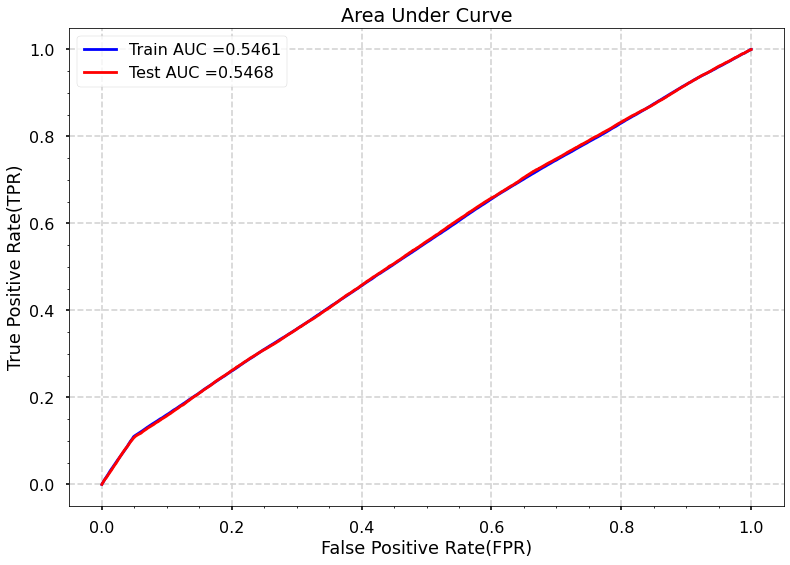

In [73]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_pred_tr[:,1])
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_pred_val[:,1])

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

#Gaussian NB train and test score is 0.54,after hypertuning also score isn't improving.

In [75]:
#getting categorical column
cat=list(set(X_tr_encoded.columns)-set(colu))

In [76]:
# Fitting the model with best params
clf_1=MultinomialNB(alpha=1000)
clf_1.fit(X_tr_encoded[cat],Y_tr)

MultinomialNB(alpha=1000)

In [77]:
# Prediction
Y_hat_tr=clf_1.predict_proba(X_tr_encoded[cat])
Y_hat_val=clf_1.predict_proba(X_val_encoded[cat])

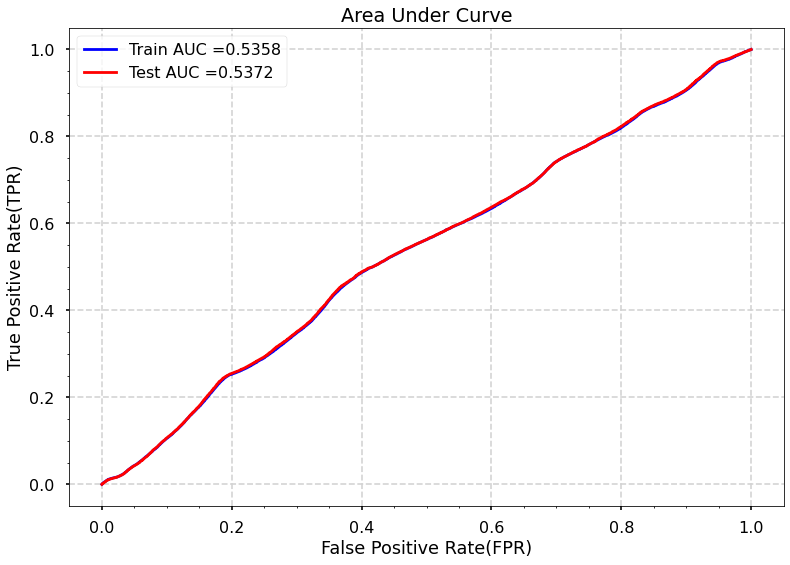

In [78]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_hat_tr[:,1])
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_hat_val[:,1])

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

#Multinomial NB train and test score is 0.53,after hypertuning also score isn't improving.

# Logistic Regression

In [52]:
# Fitting model with best params
clf2=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=5000,random_state=1,n_jobs=-1)
clf2.fit(X_tr_encoded,Y_tr)

LogisticRegression(max_iter=5000, n_jobs=-1, random_state=1, solver='newton-cg')

In [80]:
# Prediction
Y_pred_tr=clf2.predict_proba(X_tr_encoded)
Y_pred_val=clf2.predict_proba(X_val_encoded)


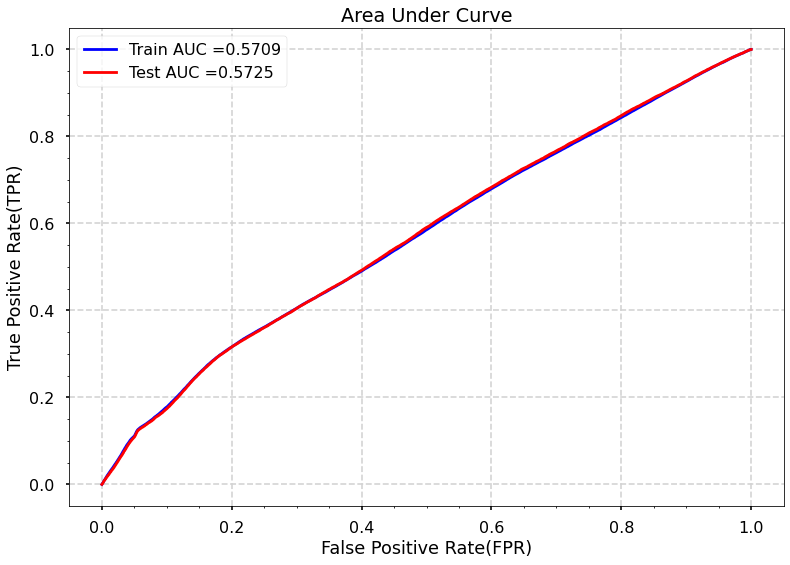

In [81]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_pred_tr[:,1])
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_pred_val[:,1])

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

#Logistic Regression train and test score is 0.57 after hypertuning.  

# SVM

In [53]:
# Fitting the model
clf3=SGDClassifier(alpha=1e-4,eta0=1e-5,random_state=1)
clf3.fit(X_tr_encoded,Y_tr)

SGDClassifier(eta0=1e-05, random_state=1)

In [84]:
#Prediction
Y_pred_tr=clf3.decision_function(X_tr_encoded)
Y_pred_val=clf3.decision_function(X_val_encoded)


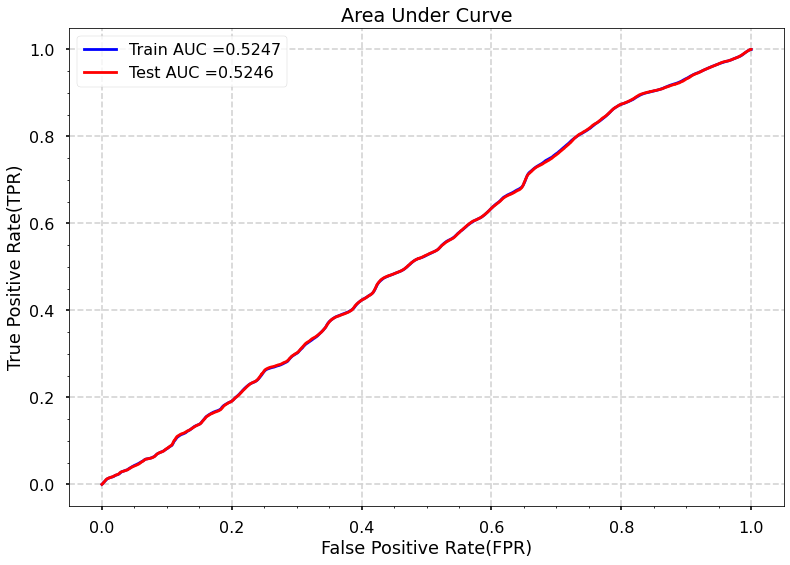

In [86]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_pred_tr)
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_pred_val)

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

# Decision Tree

In [54]:
# Fitting the model
clf4=DecisionTreeClassifier(random_state=1,max_depth=15,min_samples_split=12)
clf4.fit(X_tr_encoded,Y_tr)

DecisionTreeClassifier(max_depth=15, min_samples_split=12, random_state=1)

In [88]:
# Prediction
Y_pred_tr=clf4.predict_proba(X_tr_encoded)
Y_pred_val=clf4.predict_proba(X_val_encoded)




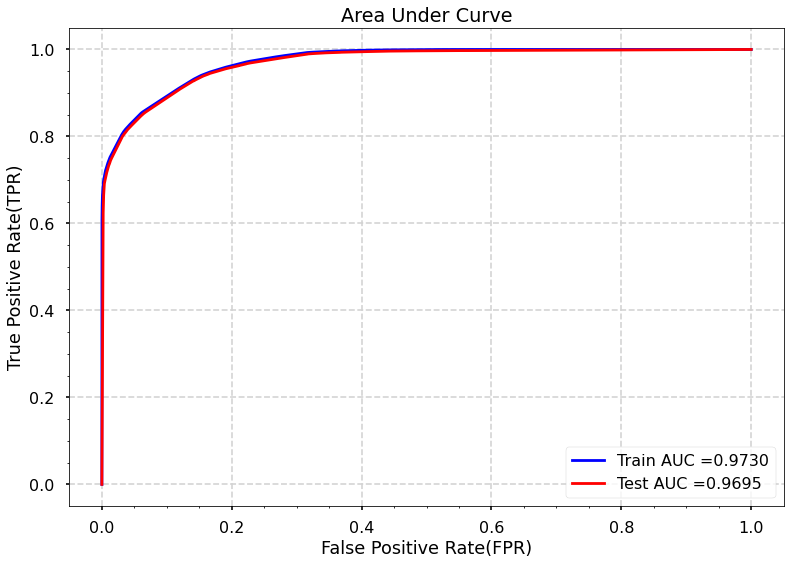

In [90]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_pred_tr[:,1])
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_pred_val[:,1])

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

# DT train  score is 0.97 and test score is 0.96 after hypertuning.

#Decision tree has increased baseline auc score from 0.58 to 0.96

# Random Forest

In [55]:
# Fitting the model
clf5=RandomForestClassifier(n_estimators=79,min_samples_split=5,max_depth=12,random_state=1)
clf5.fit(X_tr_encoded,Y_tr)

RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=79,
                       random_state=1)

In [92]:
# Prediction
Y_pred_tr=clf5.predict_proba(X_tr_encoded)
Y_pred_val=clf5.predict_proba(X_val_encoded)

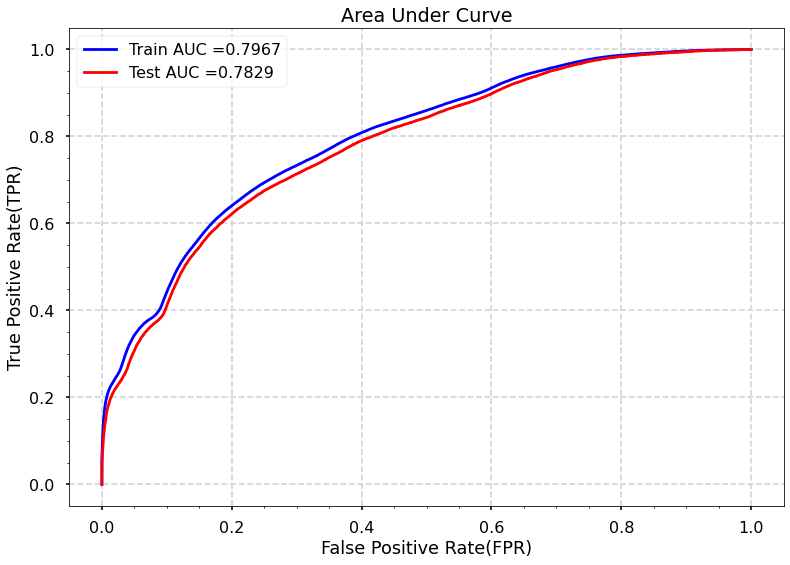

In [93]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_pred_tr[:,1])
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_pred_val[:,1])

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

#Random forest train score is 0.79 and test score is 0.78 after  hypertuning.

# XGboost

In [46]:
# Fitting the model
clf6=XGBClassifier(max_depth=10,reg_lambda=0.0001,eta=0.01,random_state=1)
clf6.fit(X_tr_encoded,Y_tr)

XGBClassifier(eta=0.01, max_depth=10, random_state=1, reg_lambda=0.0001)

In [47]:
# prediction
Y_pred_tr=clf6.predict_proba(X_tr_encoded)
Y_pred_val=clf6.predict_proba(X_val_encoded)


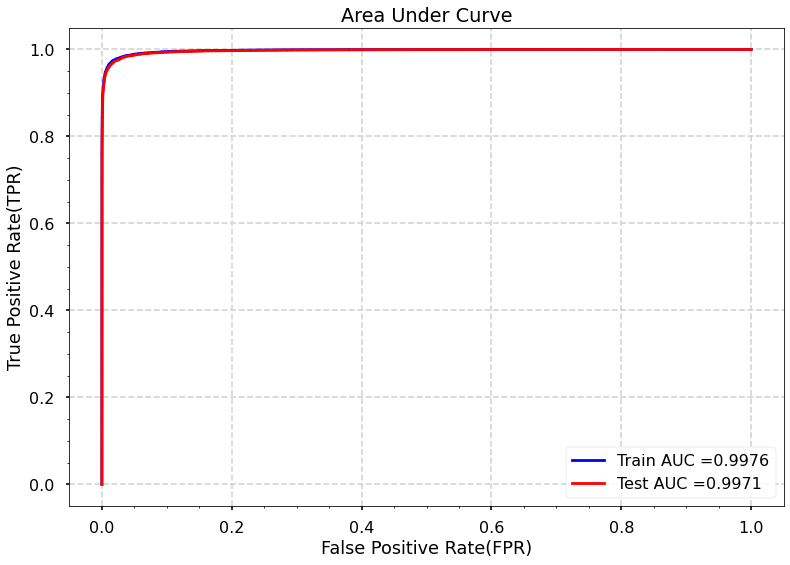

In [48]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_pred_tr[:,1])
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_pred_val[:,1])

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

#Xgboost train and test score is 0.99,hence best model.

# Stacking Classifier

In [ ]:
%pip install six
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [50]:
from mlxtend.classifier import StackingCVClassifier

In [56]:
#https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840
#from mlxtend.classifier import StackingCVClassifier 
sclf=StackingCVClassifier(classifiers=[clf3,clf4,clf5,clf6],cv=5,shuffle=False,meta_classifier=clf2) 

In [ ]:
# Fitting the model
sclf.fit(X_tr_encoded.values,Y_tr.values)

In [60]:
# Prediction
Y_pred_train=sclf.predict_proba(X_tr_encoded.values)
Y_pred_val=sclf.predict_proba(X_val_encoded.values)

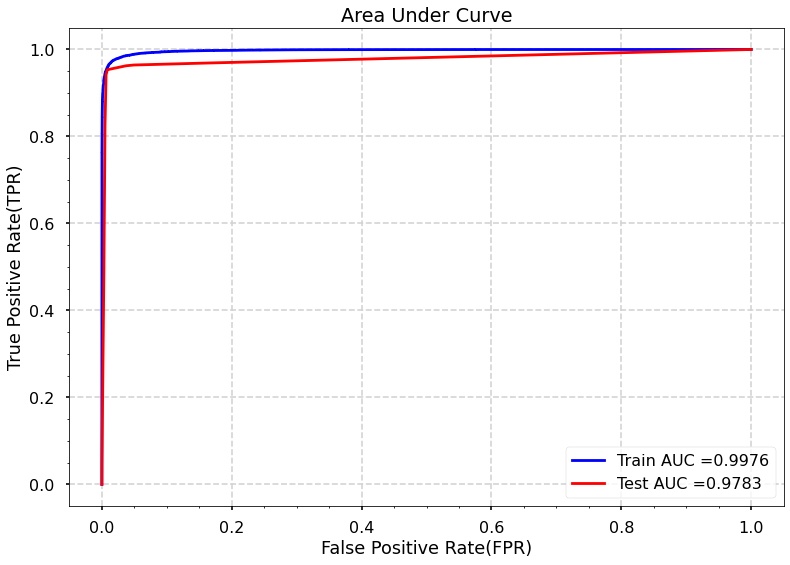

In [61]:
# calulate fpr and tpr 
train_fpr,train_tpr,thresholds=roc_curve(Y_tr,Y_pred_tr[:,1])
test_fpr,test_tpr,thresholds=roc_curve(Y_val,Y_pred_val[:,1])

# calculate train auc and test auc
train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)

# plotting the curve
with plt.style.context('seaborn-poster'):
  plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
  plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
  plt.legend()
  plt.xlabel("False Positive Rate(FPR)")
  plt.ylabel("True Positive Rate(TPR)")
  plt.title("Area Under Curve")
  plt.grid(visible=True, which='major',color='lightgrey',linestyle='--')
  plt.minorticks_on()
  plt.show()

# Deployment

In [62]:
joblib.dump(sclf,'clf.pkl')

['clf.pkl']

In [ ]:
pip install streamlit

In [64]:
#https://towardsdatascience.com/building-a-machine-learning-web-application-using-streamlit-8c3d942f7b35
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import six
import sys
sys.modules['sklearn.externals.six'] = six
PAGE_CONFIG={"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)
def main():
#title
   st.header("Healthcare Provider Fraud Detection App")

# input bar 1
   Clm=st.number_input("Enter Claim Amt Reimbursed ",key=0)

# input bar 2
   Ded=st.number_input("Enter Deductible Amt Paid ",key=1)

# input bar 3
   admit_0=st.selectbox("Enter 1 if non-admitted ",np.array([0,1]),key=2)

# input bar 
   admit_1=st.selectbox("Enter 1 if admitted ",np.array([0,1]),key=3)

# input bar 4
   day=st.number_input("Enter no of days admitted ",key=4)

# input bar 5
   gender_0=st.selectbox("Enter 0 if female  ",np.array([0,1]),key=5)

# input bar 6
   gender_1=st.selectbox("Enter 1 if  male",np.array([0,1]),key=6)

# input bar 7
   race_0=st.selectbox("Enter 1 if  race 0",np.array([0,1]),key=7)

# input bar 8
   race_1=st.selectbox("Enter 1 if  race 1 ",np.array([0,1]),key=8)

#  input bar 
   race_2=st.selectbox("Enter 1 if  race 2 ",np.array([0,1]),key=9)

# input bar 9
   Rdi_0=st.selectbox("Enter 1 if renal disease condition non-exist",np.array([0,1]),key=10)

# input bar 10
   Rdi_1=st.selectbox("Enter 1 if  renal disease condition exist",np.array([0,1]),key=11)

# input bar 11
   state=st.number_input("Enter state",key=12)

# input bar 12
   country=st.number_input("Enter country",key=13)

# input bar 13
   part_a=st.number_input("Enter no of months part A covered ",key=14)

# input bar 14
   part_b=st.number_input("Enter no of months part B covered ",key=15)

# input bar 15
   chr_alz_0=st.selectbox("Enter 1 if chronic alzheimer condition  non-exist",np.array([0,1]),key=16)

# input bar 16
   chr_alz_1=st.selectbox("Enter 1 if  chronic alzheimer condition exist",np.array([0,1]),key=17)

# input bar 17
   chr_heart_0=st.selectbox("Enter 1 if chronic heart condition non-exist",np.array([0,1]),key=18)

# input bar 18
   chr_heart_1=st.selectbox("Enter 1 if chronic heart condition exist",np.array([0,1]),key=19)

# input bar 19
   chr_kidney_0=st.selectbox("Enter 1 if chronic kidney condition non-exist",np.array([0,1]),key=20)

# input bar 20
   chr_kidney_1=st.selectbox("Enter 1 if chronic kidney condition exist",np.array([0,1]),key=21)

# input bar 21
   chr_cancer_0=st.selectbox("Enter 1 if chronic cancer condition non-exist",np.array([0,1]),key=22)

# input bar 22
   chr_cancer_1=st.selectbox("Enter 1 if chronic cancer condition exist",np.array([0,1]),key=23)

# input bar 23
   chr_pulmonary_0=st.selectbox("Enter 1 if  chronic pulmonary condition non-exist",np.array([0,1]),key=24)

# input bar 24
   chr_pulmonary_1=st.selectbox("Enter 1 if  chronic pulmonary condition exist",np.array([0,1]),key=25)

# input bar  25
   chr_depression_0=st.selectbox("Enter 1 if chronic depression condition  non-exist",np.array([0,1]),key=26)

# input bar 26
   chr_depression_1=st.selectbox("Enter 1 if chronic depression condition  exist",np.array([0,1]),key=27)

# input bar 27
   chr_diabetes_0=st.selectbox("Enter 1 if  chronic diabetes condition non-exist",np.array([0,1]),key=28)

# input bar 28
   chr_diabetes_1=st.selectbox("Enter 1 if  chronic diabetes condition exist",np.array([0,1]),key=29)

# input bar 29
   chr_ischemicheart_0=st.selectbox("Enter 1 if chronic ischemicheart condition non-exist ",np.array([0,1]),key=30)

# input bar 30
   chr_ischemicheart_1=st.selectbox("Enter 1 if chronic ischemicheart condition exist ",np.array([0,1]),key=31)

# input bar 31
   chr_osteoporasis_0=st.selectbox("Enter 1 if   chronic Osteoporasis condition non-exist ",np.array([0,1]),key=32)

# input bar 32
   chr_osteoporasis_1=st.selectbox("Enter 1 if   chronic Osteoporasis condition exist ",np.array([0,1]),key=33)

# input bar 33
   chr_arthritis_0=st.selectbox(" Enter 1 if chronic rheumatoidarthritis  condition non-exist ",np.array([0,1]),key=34)

# input bar 34
   chr_arthritis_1=st.selectbox(" Enter 1 if chronic rheumatoidarthritis  condition exist ",np.array([0,1]),key=35)

# input bar 35
   chr_stroke_0=st.selectbox("Enter 1 if chronic stroke  condition non-exist ",np.array([0,1]),key=36)

# input bar 36
   chr_stroke_1=st.selectbox("Enter 1 if chronic stroke  condition exist ",np.array([0,1]),key=37)

#input bar 37
   inpann_re=st.number_input("Enter IPAnnualReimbursementAmt",key=38)

#input bar 38
   inpann_ded=st.number_input("Enter IPAnnualDeductibleAmt",key=39)

#input bar 39
   opann_re=st.number_input("Enter OPAnnualReimbursementAmt",key=40)

#input bar 40
   opann_de=st.number_input("Enter OPAnnualDeductibleAmt",key=41)

#input bar 41
   ben_id=st.number_input("Enter Beneficiary ID",key=42)

#input bar 42
   clm_id=st.number_input("Enter Claim ID",key=43)

#input bar 43
   provider=st.number_input("Enter Provider id",key=44)

#input bar 44
   att_phy=st.number_input("Enter attending physician id ",key=45)

#input bar 45
   clm_dur=st.number_input("Enter claim duration",key=46)

#input bar 46
   Age=st.number_input("Enter Age",key=47)


# If button is pressed
   if st.button("Submit"):

# Unpickle classifier
     clf=joblib.load("clf.pkl")

#creating dict with input values
     di={'InscClaimAmtReimbursed':Clm,'DeductibleAmtPaid':Ded,'Is_admitted_0':admit_0,'Is_admitted_1':admit_1,\
         'No_of_days_admitted':day,'Gender_0':gender_0,'Gender_1':gender_1,'Race_0':race_0,'Race_1':race_1,'Race_2':race_2,\
         'RenalDiseaseIndicator_0':Rdi_0,'RenalDiseaseIndicator_1':Rdi_1,'State':state,'County':country,\
         'NoOfMonths_PartACov':part_a,'NoOfMonths_PartBCov':part_b,'ChronicCond_Alzheimer_0':chr_alz_0,'ChronicCond_Alzheimer_1':chr_alz_1,\
         'ChronicCond_Heartfailure_0':chr_heart_0,'ChronicCond_Heartfailure_1':chr_heart_1,'ChronicCond_KidneyDisease_0':chr_kidney_0,'ChronicCond_KidneyDisease_1':chr_kidney_1,\
         'ChronicCond_Cancer_0':chr_cancer_0,'ChronicCond_Cancer_1':chr_cancer_1,'ChronicCond_ObstrPulmonary_0':chr_pulmonary_0,'ChronicCond_ObstrPulmonary_1':chr_pulmonary_1,\
         'ChronicCond_Depression_0':chr_depression_0,'ChronicCond_Depression_1':chr_depression_1,'ChronicCond_Diabetes_0':chr_diabetes_0,\
         'ChronicCond_Diabetes_1':chr_diabetes_1,'ChronicCond_IschemicHeart_0':chr_ischemicheart_0,'ChronicCond_IschemicHeart_1':chr_ischemicheart_1,\
         'ChronicCond_Osteoporasis_0':chr_osteoporasis_0,'ChronicCond_Osteoporasis_1':chr_osteoporasis_1,'ChronicCond_rheumatoidarthritis_0':chr_arthritis_0,\
         'ChronicCond_rheumatoidarthritis_1':chr_arthritis_1,'ChronicCond_stroke_0':chr_stroke_0,'ChronicCond_stroke_1':chr_stroke_1,\
         'IPAnnualReimbursementAmt':inpann_re,'IPAnnualDeductibleAmt':inpann_ded,'OPAnnualReimbursementAmt':opann_re,\
         'OPAnnualDeductibleAmt':opann_de,'BenID':ben_id,'claimID':clm_id,'provider':provider,'Attendingphysician':att_phy,'Claim_Duration':clm_dur,'Age':Age}
     
     ind=np.arange(47)

# Store inputs into dataframe
     X=pd.DataFrame(di,index=ind)
     
     
    

     
     col=['Is_admitted_1','Gender_1','Race_2','RenalDiseaseIndicator_1','ChronicCond_Alzheimer_1',\
     'ChronicCond_Heartfailure_1','ChronicCond_KidneyDisease_1','ChronicCond_Cancer_1',\
     'ChronicCond_ObstrPulmonary_1', 'ChronicCond_Depression_1','ChronicCond_Diabetes_1',\
     'ChronicCond_IschemicHeart_1','ChronicCond_Osteoporasis_1','ChronicCond_rheumatoidarthritis_1',\
     'ChronicCond_stroke_1']

#Removing encoded column as one best represents others.
     X.drop(columns=col,axis=1,inplace=True)
     colu=['InscClaimAmtReimbursed','DeductibleAmtPaid','No_of_days_admitted','NoOfMonths_PartACov',\
          'NoOfMonths_PartBCov','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',\
          'OPAnnualDeductibleAmt', 'BenID', 'claimID', 'provider','Attendingphysician', 'Claim_Duration', 'Age']

#Normalisation  
     scale=MinMaxScaler()
     scale.fit(X[colu])
     scaled_X=scale.transform(X[colu])
     X[colu]=scaled_X
     

# Get prediction
     prediction=clf.predict(X.values)

# Output prediction
     st.text(f"This instance is a {(lambda x : 'Fraud' if(x==1).any() else 'legitimate')(prediction[0])}")
    
if __name__ == '__main__':
	main()    

 

  






Writing app.py


In [2]:
pip freeze > requirements.txt